In [2]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

# load data

In [3]:
def get_ugrd_data(year, lon, lat):
    csv_dir_path="../data/csv"
    file_path="{0}/{1}/{2}".format(csv_dir_path, lon, lat)

    ugrd_file_name="{0}/{1}_{2}_UGRD_{3}.csv".format(file_path, lon, lat, year)
    ugrd_data = np.genfromtxt(ugrd_file_name, delimiter=",", dtype='float')
    return ugrd_data[:,1]

def get_vgrd_data(year, lon, lat):
    csv_dir_path="../data/csv"
    file_path="{0}/{1}/{2}".format(csv_dir_path, lon, lat)

    vgrd_file_name="{0}/{1}_{2}_VGRD_{3}.csv".format(file_path, lon, lat, year)
    vgrd_data = np.genfromtxt(vgrd_file_name, delimiter=",", dtype='float')
    return vgrd_data[:,1]


year = 2017
lons=["139.2500", "139.3125", "139.3750", "139.4375"]
lats=["35.20", "35.25", "35.30", "35.35", "35.40"]

data_msm = pd.DataFrame(columns=["time"])
data_msm["time"] = pd.date_range('2017-07-01 9:00:00', periods=1488, freq='H')

i = 0
for lon in lons:
    for lat in lats:
        data_msm["UGRD_{0}".format(i)] = get_ugrd_data(year, lon, lat)
        data_msm["VGRD_{0}".format(i)] = get_vgrd_data(year, lon, lat)
        print("{0}: lon{1}, lat{2}".format(i, lon, lat))
        i = i + 1
# data_msm

0: lon139.2500, lat35.20
1: lon139.2500, lat35.25
2: lon139.2500, lat35.30
3: lon139.2500, lat35.35
4: lon139.2500, lat35.40
5: lon139.3125, lat35.20
6: lon139.3125, lat35.25
7: lon139.3125, lat35.30
8: lon139.3125, lat35.35
9: lon139.3125, lat35.40
10: lon139.3750, lat35.20
11: lon139.3750, lat35.25
12: lon139.3750, lat35.30
13: lon139.3750, lat35.35
14: lon139.3750, lat35.40
15: lon139.4375, lat35.20
16: lon139.4375, lat35.25
17: lon139.4375, lat35.30
18: lon139.4375, lat35.35
19: lon139.4375, lat35.40


In [4]:
avg_10min_data_path = "../data/hiratsuka/avg_10min"
year = 2017

data_path = "{0}/{1}".format(avg_10min_data_path, year)

df = pd.DataFrame(columns=["UGRD", "VGRD"])
for month in range(7, 8 + 1):
    for day in range(1, 31 + 1):
        file_name = "{0}{1:02d}{2:02d}.csv".format(year, month, day)
        file_dath = "{0}/{1}".format(data_path, file_name)

        data = pd.read_csv(file_dath, header=0)
        df = pd.concat([df, data[["UGRD", "VGRD"]]])

df["time"] = pd.date_range('2017-07-01 00:00:00', periods=8928 ,freq='10min')
df = df.reset_index(drop = True)
data_hiratsuka_10min = df

# visualize

In [7]:
def plot_wind(start, end):
    
    fig = plt.figure(figsize=(18, 12), dpi=80)
    ax1 = fig.add_subplot(2,1,1)

    data_1 = data_hiratsuka_10min.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))
    data_2 = data_msm.query('time >= \"{0}\" & time < \"{1}\"'.format(start, end))

    ax1.plot(data_1["time"], data_1["UGRD"], label = "Hiratsuka")
    for i in [0, 5, 15]:
        ax1.plot(data_2["time"], data_2["UGRD_{0}".format(i)], label = "MSM {0}".format(i))

    plt.legend()
    plt.show()

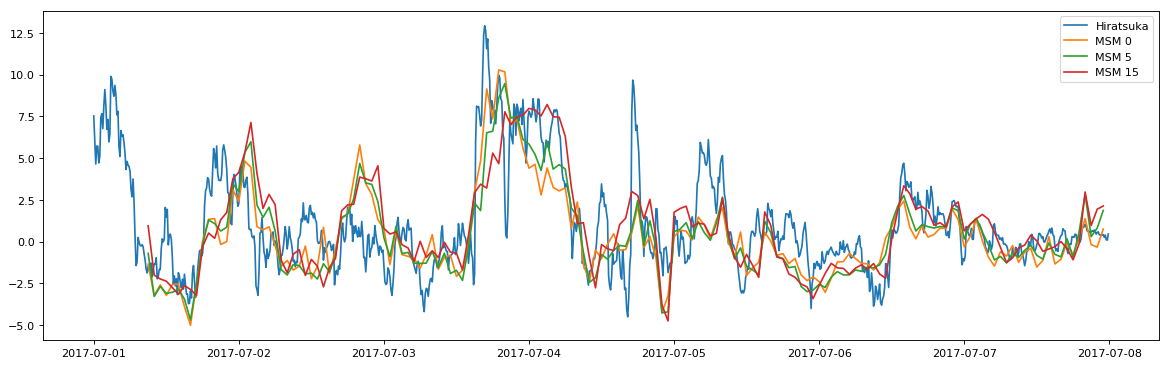

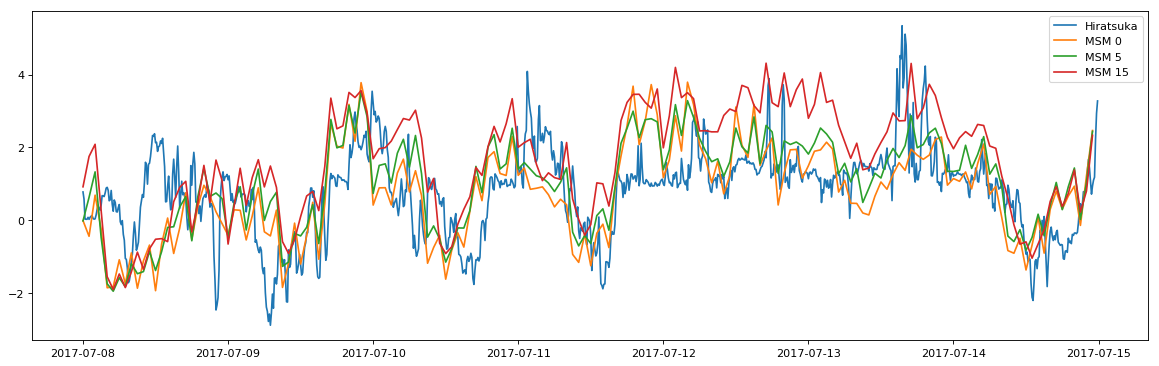

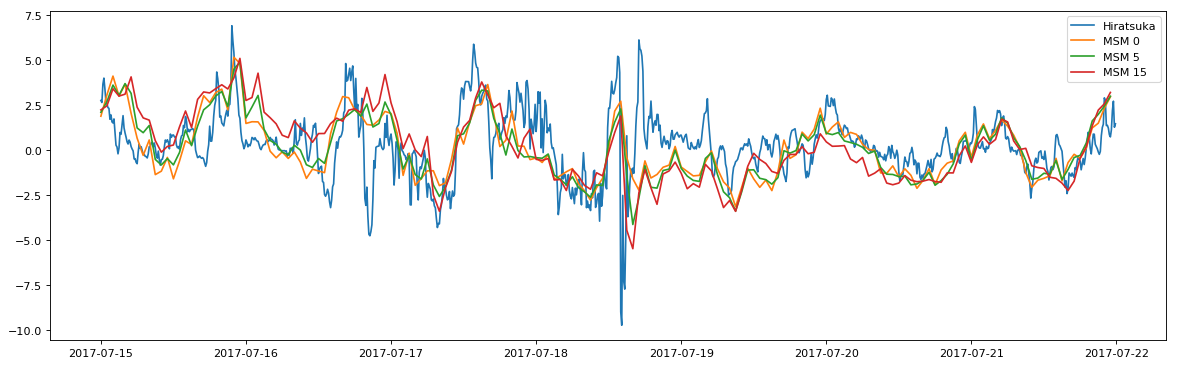

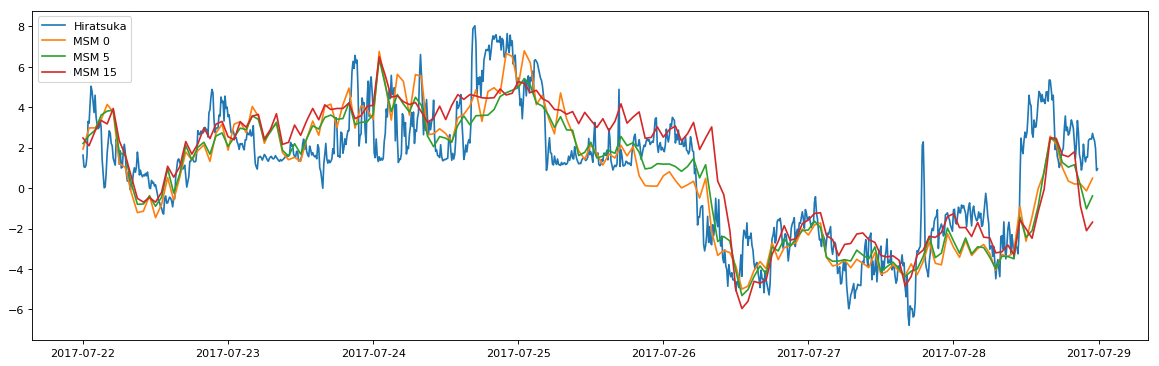

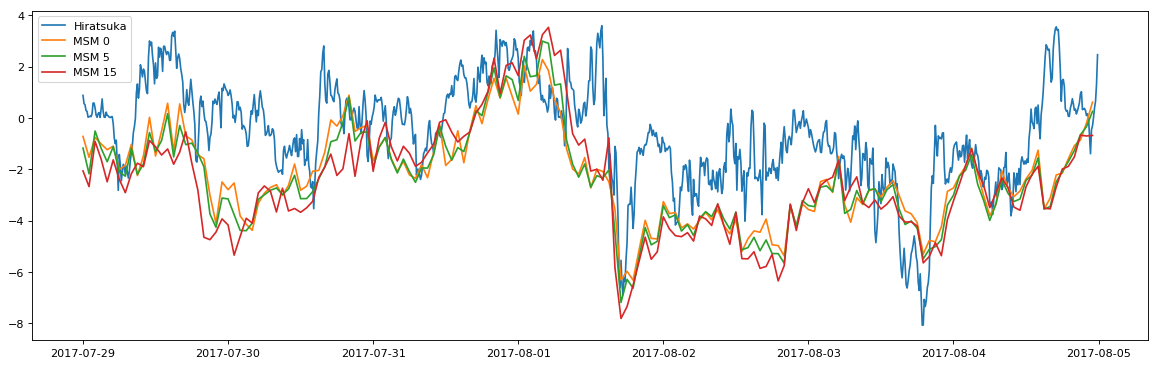

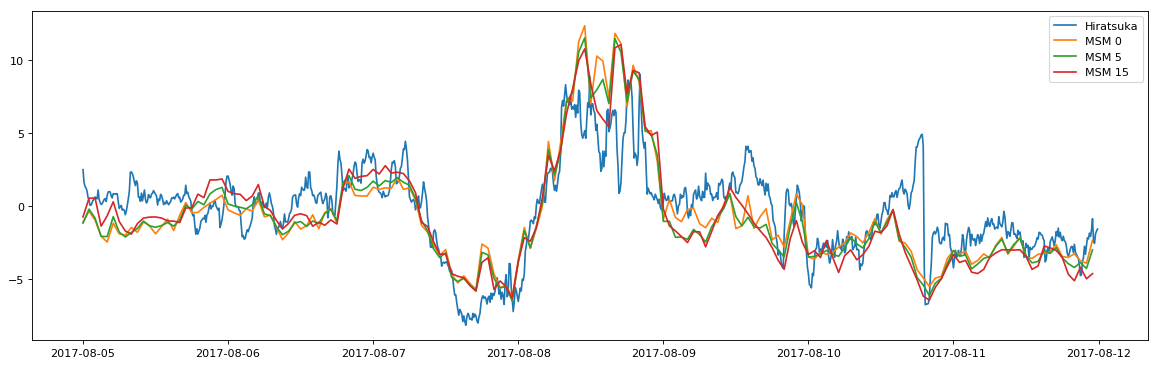

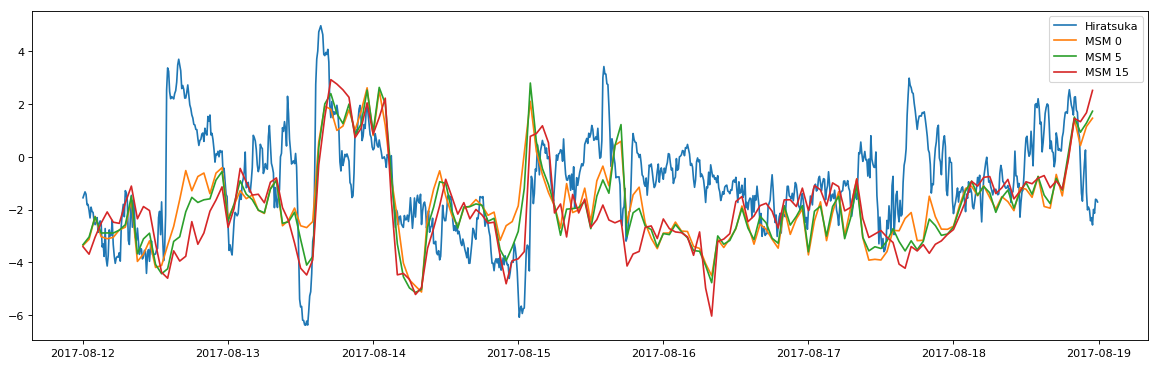

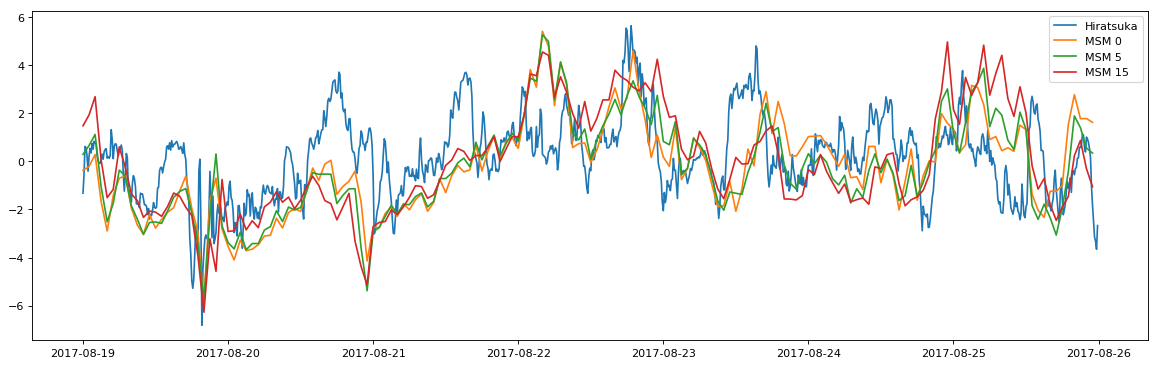

In [8]:
delta = 7
start = datetime(2017,7,1,0,0,0)
end = start + timedelta(days=delta)

while end < datetime(2017,9,1,0,0,0):
    plot_wind(start, end)
    start = start + timedelta(days=delta)
    end = start + timedelta(days=delta)